In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rxr
from sklearn.linear_model import LinearRegression

In [ ]:
ndvi_orto = rxr.open_rasterio(r"../data/ndvi_orto_clip.tif")
df_orto = ndvi_orto.to_dataframe(name='value').reset_index()
df_orto = df_orto.dropna()

ndvi_s2 = rxr.open_rasterio(r"../data/ndvi_s2_clip.tif")
df_s2 = ndvi_s2.to_dataframe(name='value').reset_index()
df_s2 = df_s2.dropna()

df = pd.merge(df_orto, df_s2, on=['x', 'y'], suffixes=('_orto', '_s2'))
df = df[df["value_orto"] > -2]
df2 = df[["x", "y", "value_orto", "value_s2"]]

In [ ]:
X = df2["value_orto"].astype(np.float64).values.reshape(-1, 1)
y = df2["value_s2"].astype(np.float64).values

reg = LinearRegression().fit(X, y)

print(reg.coef_, reg.intercept_)
print(reg.score(X, y))

[0.72300482] 0.06836293745179822
0.8292787311144006


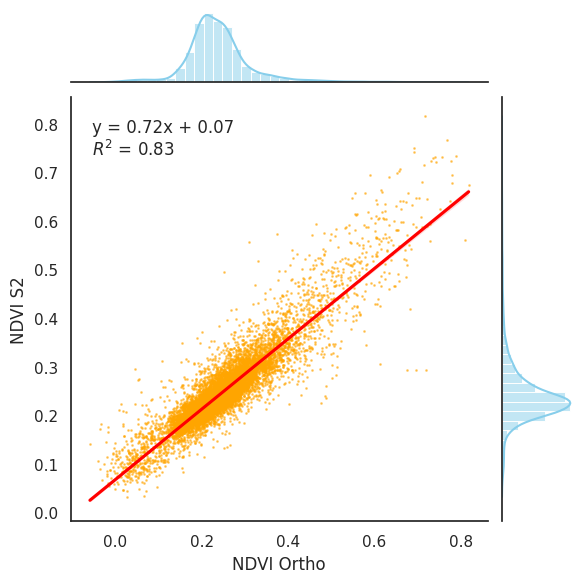

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

with sns.axes_style('white'):
    g = sns.jointplot(x="value_orto", y="value_s2", data=df2, kind='reg', color='skyblue', 
                      joint_kws={'color':'orange'}, marginal_kws=dict(bins=40, fill=True),
                      scatter_kws={'s': 1, 'alpha': 0.5}, line_kws={'color': 'red'})
    g.set_axis_labels('NDVI Ortho', 'NDVI S2', fontsize=12)
    equation_text = f'y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}\n$R^2$ = {reg.score(X, y):.2f}'
    plt.text(0.05, 0.95, equation_text, transform=g.ax_joint.transAxes, fontsize=12, verticalalignment='top')